In [1]:
import pandas as pd #mengimport data
import numpy as np #data numerik

from google.colab import drive
drive.mount("/content/gdrive", force_remount=True) #mount dari google drive
dataset ='gdrive/My Drive/'

#file csv yang kita ambil dari google drive yang sudah di upload
dataset ='gdrive/My Drive/Skripisi Yaya/DATASET.csv'
data = pd.read_csv(dataset)
data.head(10)


Mounted at /content/gdrive


,userName,score,at,content
0,Ajat Sudrajat,1,2023-05-27 12:48:14,mohon penjelasannya dong sayamasuk aplikasi KT...
1,Yosua Wijaya,2,2023-05-27 07:19:44,Sama saja harus datang ke dukcapil gak hemat w...
2,Novita Khasanah,1,2023-05-27 03:27:19,Tips plis dong kak cara mengatasi lupa pin/san...
3,Rika Fitria,1,2023-05-27 03:26:49,apk jlk
4,Akatsuki Maftukhan,2,2023-05-27 02:11:14,"Aplikasi lelet banget, sering bug buka dokumen..."
5,Adji Winarko,3,2023-05-26 23:59:47,bagus
6,Ahmad Adadisini,1,2023-05-26 17:59:32,"Gak bisa daftar selalu coba lagi,, kesalahan k..."
7,Ukhti Rhaya,5,2023-05-26 17:53:01,Ajib....🦈🤙🐊
8,felix Ofel,5,2023-05-26 16:42:28,Sangat baik
9,Trie Sutrisno,5,2023-05-26 16:14:13,Mudah Pelayanan nya Cepat dan tanggap dan tepat.


In [2]:
#TAHAPAN PREPROCESSING 

#------ Case Folding --------

data['casefolding'] = data['content'].str.lower()


print('Case Folding Result : ')
print(data['casefolding'].head(10))

Case Folding Result : 
0    mohon penjelasannya dong sayamasuk aplikasi kt...
1    sama saja harus datang ke dukcapil gak hemat w...
2    tips plis dong kak cara mengatasi lupa pin/san...
3                                              apk jlk
4    aplikasi lelet banget, sering bug buka dokumen...
5                                                bagus
6    gak bisa daftar selalu coba lagi,, kesalahan k...
7                                          ajib....🦈🤙🐊
8                                          sangat baik
9     mudah pelayanan nya cepat dan tanggap dan tepat.
Name: casefolding, dtype: object


In [3]:
#------ Cleansing --------

import string #menampilkan karakter dalam tanda kutip
import re #mencari suatu string berisikan pola pencarian yang spesifik

def cleansing(text):
  text = re.sub(r'@[A-Za-a0-9]+',' ',text) 
  text = re.sub(r'#[A-Za-z0-9]+',' ',text)
  text = re.sub(r"http\S+",' ',text)
  text = text.encode('ascii', 'ignore').decode('ascii')
  text = re.sub(r'[0-9]+',' ',text)
  text = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", text)
  text = text.strip(' ')
  return text
data['cleaning'] = data['content'].apply(cleansing)

print('Cleaning Result : ')
print(data['cleaning'].head(10))

Cleaning Result : 
0    mohon penjelasannya dong sayamasuk aplikasi KT...
1    Sama saja harus datang ke dukcapil gak hemat w...
2    Tips plis dong kak cara mengatasi lupa pin san...
3                                              apk jlk
4    Aplikasi lelet banget  sering bug buka dokumen...
5                                                bagus
6    Gak bisa daftar selalu coba lagi   kesalahan k...
7                                                 Ajib
8                                          Sangat baik
9      Mudah Pelayanan nya Cepat dan tanggap dan tepat
Name: cleaning, dtype: object


In [4]:
#------ Tokenize --------

import nltk 
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def word_tokenize_wrapper(text):
    return word_tokenize(text)

data['tokenize'] = data['cleaning'].apply(word_tokenize_wrapper)

print('Tokenize Result : ') 
print(data['tokenize'].head(10))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Tokenize Result : 
0    [mohon, penjelasannya, dong, sayamasuk, aplika...
1    [Sama, saja, harus, datang, ke, dukcapil, gak,...
2    [Tips, plis, dong, kak, cara, mengatasi, lupa,...
3                                           [apk, jlk]
4    [Aplikasi, lelet, banget, sering, bug, buka, d...
5                                              [bagus]
6    [Gak, bisa, daftar, selalu, coba, lagi, kesala...
7                                               [Ajib]
8                                       [Sangat, baik]
9    [Mudah, Pelayanan, nya, Cepat, dan, tanggap, d...
Name: tokenize, dtype: object


In [5]:
#------ Normalisasi --------

normal ='gdrive/My Drive/Colab Notebooks/normalisasi.csv'
normalizad_word = pd.read_csv(normal)

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

data['normalisasi'] = data['tokenize'].apply(normalized_term)

print('Normalisasi Result : ') 
print(data['normalisasi'].head(10))

Normalisasi Result : 
0    [mohon, penjelasannya, dong, sayamasuk, aplika...
1    [Sama, saja, harus, datang, kah, dukcapil, tid...
2    [Tips, plis, dong, kak, cara, mengatasi, lupa,...
3                                      [aplikasi, jlk]
4    [Aplikasi, lambat, sekali, sering, bug, buka, ...
5                                              [bagus]
6    [Gak, bisa, daftar, selalu, coba, lagi, kesala...
7                                               [Ajib]
8                                       [Sangat, baik]
9    [Mudah, Pelayanan, nya, Cepat, dan, tanggap, d...
Name: normalisasi, dtype: object


In [6]:
#------ Stopword --------

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')
print(len(list_stopwords))
# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])
len(list_stopwords)
# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
stw ='gdrive/My Drive/Colab Notebooks/stopwordbahasa.csv'
txt_stopword = pd.read_csv(stw, "stopwordbahasa.csv", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
len(list_stopwords)

# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]
data['stopword'] = data['normalisasi'].apply(stopwords_removal) 

print('Stopword Result : ') 
print(data['stopword'].head(10))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-6-19da4f944cf1>:24: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  txt_stopword = pd.read_csv(stw, "stopwordbahasa.csv", names= ["stopwords"], header = None)
<ipython-input-6-19da4f944cf1>:24: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  txt_stopword = pd.read_csv(stw, "stopwordbahasa.csv", names= ["stopwords"], header = None)


758
Stopword Result : 
0    [mohon, penjelasannya, sayamasuk, aplikasi, KT...
1                  [Sama, kah, dukcapil, hemat, sibuk]
2    [Tips, plis, kak, mengatasi, lupa, pin, sandi,...
3                                      [aplikasi, jlk]
4    [Aplikasi, lambat, bug, buka, dokumen, Rendah,...
5                                              [bagus]
6    [Gak, daftar, coba, kesalahan, koneksi, ganti,...
7                                               [Ajib]
8                                             [Sangat]
9                   [Mudah, Pelayanan, Cepat, tanggap]
Name: stopword, dtype: object


In [7]:
# import Sastrawi package
!pip install Sastrawi
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.7 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16299 sha256=7066f89e7e79c840e3e3c5e5e4fe372478a880bae519792d03187310b9efa684
  Stored in directory: /root/.cache/pip/wheels/6c/bd/3e/2d6afc9bc36c9975f8e4215a270bbac6580c4361ebd6bb2323
Successfully built swifter


In [8]:
#------ Stemming --------

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)
term_dict = {}
for document in data['stopword']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]
data['stemming'] = data['stopword'].swifter.apply(get_stemmed_term)

print('Stemming Result : ') 
print(data['stemming'].head(10))

Output streaming akan dipotong hingga 5000 baris terakhir.
DUIT : duit
TENDER : tender
UJUNG : ujung
UJUNGNYA : ujung
SUSAH : susah
sudh : sudh
menghapus : hapus
Cardless : cardless
pantauan : pantau
pengawasan : awas
Anda : anda
save : save
for : for
saving : saving
digitally : digitally
Menginstal : menginstal
Applikasi : applikasi
mengaktifkannya : aktif
pengaktifan : aktif
dipandu : pandu
karyawan : karyawan
Adapun : adapun
terkendala : kendala
gemana : gana
pilhan : pilhan
DukCapil : dukcapil
mksih : mksih
mukomuko : mukomuko
apaansi : apaansi
ngeluarin : ngeluarin
kentang : kentang
kekurangannya : kurang
space : space
terbuang : buang
dmana : dmana
Tulisannya : tulis
Gaje : gaje
TPS : tps
Februari : februari
Kesehatan : sehat
beda : beda
dibutuhkn : dibutuhkn
Tes : tes
Mantaopppp : mantaopppp
GG : gg
Guna : guna
Efektif : efektif
Ilike : ilike
Foto : foto
Gelap : gelap
Invinix : invinix
Asiapp : asiapp
Hadeeee : hadeeee
kalinya : kali
b : b
Sek : sek
nang : nang
Mksh : mksh
jatem

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Stemming Result : 
0    [mohon, jelas, sayamasuk, aplikasi, ktp, digit...
1                  [sama, kah, dukcapil, hemat, sibuk]
2    [tips, plis, kak, atas, lupa, pin, sandi, puny...
3                                      [aplikasi, jlk]
4    [aplikasi, lambat, bug, buka, dokumen, rendah,...
5                                              [bagus]
6    [gak, daftar, coba, salah, koneksi, ganti, pro...
7                                               [ajib]
8                                             [sangat]
9                       [mudah, layan, cepat, tanggap]
Name: stemming, dtype: object


In [9]:
data['CleanContent'] = data['stemming'].apply(lambda x: ' '.join(x))
data.to_csv("datasetclean.csv")
data.head(10)

,userName,score,at,content,casefolding,cleaning,tokenize,normalisasi,stopword,stemming,CleanContent
0,Ajat Sudrajat,1,2023-05-27 12:48:14,mohon penjelasannya dong sayamasuk aplikasi KT...,mohon penjelasannya dong sayamasuk aplikasi kt...,mohon penjelasannya dong sayamasuk aplikasi KT...,"[mohon, penjelasannya, dong, sayamasuk, aplika...","[mohon, penjelasannya, dong, sayamasuk, aplika...","[mohon, penjelasannya, sayamasuk, aplikasi, KT...","[mohon, jelas, sayamasuk, aplikasi, ktp, digit...",mohon jelas sayamasuk aplikasi ktp digital ema...
1,Yosua Wijaya,2,2023-05-27 07:19:44,Sama saja harus datang ke dukcapil gak hemat w...,sama saja harus datang ke dukcapil gak hemat w...,Sama saja harus datang ke dukcapil gak hemat w...,"[Sama, saja, harus, datang, ke, dukcapil, gak,...","[Sama, saja, harus, datang, kah, dukcapil, tid...","[Sama, kah, dukcapil, hemat, sibuk]","[sama, kah, dukcapil, hemat, sibuk]",sama kah dukcapil hemat sibuk
2,Novita Khasanah,1,2023-05-27 03:27:19,Tips plis dong kak cara mengatasi lupa pin/san...,tips plis dong kak cara mengatasi lupa pin/san...,Tips plis dong kak cara mengatasi lupa pin san...,"[Tips, plis, dong, kak, cara, mengatasi, lupa,...","[Tips, plis, dong, kak, cara, mengatasi, lupa,...","[Tips, plis, kak, mengatasi, lupa, pin, sandi,...","[tips, plis, kak, atas, lupa, pin, sandi, puny...",tips plis kak atas lupa pin sandi punya buka
3,Rika Fitria,1,2023-05-27 03:26:49,apk jlk,apk jlk,apk jlk,"[apk, jlk]","[aplikasi, jlk]","[aplikasi, jlk]","[aplikasi, jlk]",aplikasi jlk
4,Akatsuki Maftukhan,2,2023-05-27 02:11:14,"Aplikasi lelet banget, sering bug buka dokumen...","aplikasi lelet banget, sering bug buka dokumen...",Aplikasi lelet banget sering bug buka dokumen...,"[Aplikasi, lelet, banget, sering, bug, buka, d...","[Aplikasi, lambat, sekali, sering, bug, buka, ...","[Aplikasi, lambat, bug, buka, dokumen, Rendah,...","[aplikasi, lambat, bug, buka, dokumen, rendah,...",aplikasi lambat bug buka dokumen rendah it neg...
5,Adji Winarko,3,2023-05-26 23:59:47,bagus,bagus,bagus,[bagus],[bagus],[bagus],[bagus],bagus
6,Ahmad Adadisini,1,2023-05-26 17:59:32,"Gak bisa daftar selalu coba lagi,, kesalahan k...","gak bisa daftar selalu coba lagi,, kesalahan k...",Gak bisa daftar selalu coba lagi kesalahan k...,"[Gak, bisa, daftar, selalu, coba, lagi, kesala...","[Gak, bisa, daftar, selalu, coba, lagi, kesala...","[Gak, daftar, coba, kesalahan, koneksi, ganti,...","[gak, daftar, coba, salah, koneksi, ganti, pro...",gak daftar coba salah koneksi ganti provider s...
7,Ukhti Rhaya,5,2023-05-26 17:53:01,Ajib....🦈🤙🐊,ajib....🦈🤙🐊,Ajib,[Ajib],[Ajib],[Ajib],[ajib],ajib
8,felix Ofel,5,2023-05-26 16:42:28,Sangat baik,sangat baik,Sangat baik,"[Sangat, baik]","[Sangat, baik]",[Sangat],[sangat],sangat
9,Trie Sutrisno,5,2023-05-26 16:14:13,Mudah Pelayanan nya Cepat dan tanggap dan tepat.,mudah pelayanan nya cepat dan tanggap dan tepat.,Mudah Pelayanan nya Cepat dan tanggap dan tepat,"[Mudah, Pelayanan, nya, Cepat, dan, tanggap, d...","[Mudah, Pelayanan, nya, Cepat, dan, tanggap, d...","[Mudah, Pelayanan, Cepat, tanggap]","[mudah, layan, cepat, tanggap]",mudah layan cepat tanggap


In [10]:
# Pelabelan
posi ='gdrive/My Drive/Skripisi Yaya/positive.txt'
pos_sent = open(posi).read()
positive_words=pos_sent.split('\n')

In [11]:
neg ='gdrive/My Drive/Skripisi Yaya/negative.txt'
neg_sent = open(neg).read()
negative_words=neg_sent.split('\n')

In [12]:
data['CleanContent'] = [str(tw) for tw in data['CleanContent']]

In [13]:
data['count'] = data['CleanContent'].apply(lambda review_text: sum(0 + ((word in positive_words) and 1) + ((word in negative_words) and -1) for word in review_text.split()))

In [14]:
data['sentimen'] = 'netral'
data['sentimen'][data['count']>0] = 'positif'
data['sentimen'][data['count']<0] = 'negatif'
data['sentimen'][data['count']==0] = 'netral'

<ipython-input-14-ac9ac5e9bfe0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentimen'][data['count']>0] = 'positif'
<ipython-input-14-ac9ac5e9bfe0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentimen'][data['count']<0] = 'negatif'
<ipython-input-14-ac9ac5e9bfe0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentimen'][data['count']==0] = 'netral'


In [15]:
data.head(10)

,userName,score,at,content,casefolding,cleaning,tokenize,normalisasi,stopword,stemming,CleanContent,count,sentimen
0,Ajat Sudrajat,1,2023-05-27 12:48:14,mohon penjelasannya dong sayamasuk aplikasi KT...,mohon penjelasannya dong sayamasuk aplikasi kt...,mohon penjelasannya dong sayamasuk aplikasi KT...,"[mohon, penjelasannya, dong, sayamasuk, aplika...","[mohon, penjelasannya, dong, sayamasuk, aplika...","[mohon, penjelasannya, sayamasuk, aplikasi, KT...","[mohon, jelas, sayamasuk, aplikasi, ktp, digit...",mohon jelas sayamasuk aplikasi ktp digital ema...,2,positif
1,Yosua Wijaya,2,2023-05-27 07:19:44,Sama saja harus datang ke dukcapil gak hemat w...,sama saja harus datang ke dukcapil gak hemat w...,Sama saja harus datang ke dukcapil gak hemat w...,"[Sama, saja, harus, datang, ke, dukcapil, gak,...","[Sama, saja, harus, datang, kah, dukcapil, tid...","[Sama, kah, dukcapil, hemat, sibuk]","[sama, kah, dukcapil, hemat, sibuk]",sama kah dukcapil hemat sibuk,1,positif
2,Novita Khasanah,1,2023-05-27 03:27:19,Tips plis dong kak cara mengatasi lupa pin/san...,tips plis dong kak cara mengatasi lupa pin/san...,Tips plis dong kak cara mengatasi lupa pin san...,"[Tips, plis, dong, kak, cara, mengatasi, lupa,...","[Tips, plis, dong, kak, cara, mengatasi, lupa,...","[Tips, plis, kak, mengatasi, lupa, pin, sandi,...","[tips, plis, kak, atas, lupa, pin, sandi, puny...",tips plis kak atas lupa pin sandi punya buka,-1,negatif
3,Rika Fitria,1,2023-05-27 03:26:49,apk jlk,apk jlk,apk jlk,"[apk, jlk]","[aplikasi, jlk]","[aplikasi, jlk]","[aplikasi, jlk]",aplikasi jlk,0,netral
4,Akatsuki Maftukhan,2,2023-05-27 02:11:14,"Aplikasi lelet banget, sering bug buka dokumen...","aplikasi lelet banget, sering bug buka dokumen...",Aplikasi lelet banget sering bug buka dokumen...,"[Aplikasi, lelet, banget, sering, bug, buka, d...","[Aplikasi, lambat, sekali, sering, bug, buka, ...","[Aplikasi, lambat, bug, buka, dokumen, Rendah,...","[aplikasi, lambat, bug, buka, dokumen, rendah,...",aplikasi lambat bug buka dokumen rendah it neg...,-3,negatif
5,Adji Winarko,3,2023-05-26 23:59:47,bagus,bagus,bagus,[bagus],[bagus],[bagus],[bagus],bagus,1,positif
6,Ahmad Adadisini,1,2023-05-26 17:59:32,"Gak bisa daftar selalu coba lagi,, kesalahan k...","gak bisa daftar selalu coba lagi,, kesalahan k...",Gak bisa daftar selalu coba lagi kesalahan k...,"[Gak, bisa, daftar, selalu, coba, lagi, kesala...","[Gak, bisa, daftar, selalu, coba, lagi, kesala...","[Gak, daftar, coba, kesalahan, koneksi, ganti,...","[gak, daftar, coba, salah, koneksi, ganti, pro...",gak daftar coba salah koneksi ganti provider s...,-2,negatif
7,Ukhti Rhaya,5,2023-05-26 17:53:01,Ajib....🦈🤙🐊,ajib....🦈🤙🐊,Ajib,[Ajib],[Ajib],[Ajib],[ajib],ajib,0,netral
8,felix Ofel,5,2023-05-26 16:42:28,Sangat baik,sangat baik,Sangat baik,"[Sangat, baik]","[Sangat, baik]",[Sangat],[sangat],sangat,-1,negatif
9,Trie Sutrisno,5,2023-05-26 16:14:13,Mudah Pelayanan nya Cepat dan tanggap dan tepat.,mudah pelayanan nya cepat dan tanggap dan tepat.,Mudah Pelayanan nya Cepat dan tanggap dan tepat,"[Mudah, Pelayanan, nya, Cepat, dan, tanggap, d...","[Mudah, Pelayanan, nya, Cepat, dan, tanggap, d...","[Mudah, Pelayanan, Cepat, tanggap]","[mudah, layan, cepat, tanggap]",mudah layan cepat tanggap,2,positif


In [16]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data.to_csv("datalabel.csv", encoding='utf-8', index=False)

In [17]:
data.head(10)

,userName,score,at,content,casefolding,cleaning,tokenize,normalisasi,stopword,stemming,CleanContent,count,sentimen
0,Ajat Sudrajat,1,2023-05-27 12:48:14,mohon penjelasannya dong sayamasuk aplikasi KT...,mohon penjelasannya dong sayamasuk aplikasi kt...,mohon penjelasannya dong sayamasuk aplikasi KT...,"[mohon, penjelasannya, dong, sayamasuk, aplika...","[mohon, penjelasannya, dong, sayamasuk, aplika...","[mohon, penjelasannya, sayamasuk, aplikasi, KT...","[mohon, jelas, sayamasuk, aplikasi, ktp, digit...",mohon jelas sayamasuk aplikasi ktp digital ema...,2,positif
1,Yosua Wijaya,2,2023-05-27 07:19:44,Sama saja harus datang ke dukcapil gak hemat w...,sama saja harus datang ke dukcapil gak hemat w...,Sama saja harus datang ke dukcapil gak hemat w...,"[Sama, saja, harus, datang, ke, dukcapil, gak,...","[Sama, saja, harus, datang, kah, dukcapil, tid...","[Sama, kah, dukcapil, hemat, sibuk]","[sama, kah, dukcapil, hemat, sibuk]",sama kah dukcapil hemat sibuk,1,positif
2,Novita Khasanah,1,2023-05-27 03:27:19,Tips plis dong kak cara mengatasi lupa pin/san...,tips plis dong kak cara mengatasi lupa pin/san...,Tips plis dong kak cara mengatasi lupa pin san...,"[Tips, plis, dong, kak, cara, mengatasi, lupa,...","[Tips, plis, dong, kak, cara, mengatasi, lupa,...","[Tips, plis, kak, mengatasi, lupa, pin, sandi,...","[tips, plis, kak, atas, lupa, pin, sandi, puny...",tips plis kak atas lupa pin sandi punya buka,-1,negatif
3,Rika Fitria,1,2023-05-27 03:26:49,apk jlk,apk jlk,apk jlk,"[apk, jlk]","[aplikasi, jlk]","[aplikasi, jlk]","[aplikasi, jlk]",aplikasi jlk,0,netral
4,Akatsuki Maftukhan,2,2023-05-27 02:11:14,"Aplikasi lelet banget, sering bug buka dokumen...","aplikasi lelet banget, sering bug buka dokumen...",Aplikasi lelet banget sering bug buka dokumen...,"[Aplikasi, lelet, banget, sering, bug, buka, d...","[Aplikasi, lambat, sekali, sering, bug, buka, ...","[Aplikasi, lambat, bug, buka, dokumen, Rendah,...","[aplikasi, lambat, bug, buka, dokumen, rendah,...",aplikasi lambat bug buka dokumen rendah it neg...,-3,negatif
5,Adji Winarko,3,2023-05-26 23:59:47,bagus,bagus,bagus,[bagus],[bagus],[bagus],[bagus],bagus,1,positif
6,Ahmad Adadisini,1,2023-05-26 17:59:32,"Gak bisa daftar selalu coba lagi,, kesalahan k...","gak bisa daftar selalu coba lagi,, kesalahan k...",Gak bisa daftar selalu coba lagi kesalahan k...,"[Gak, bisa, daftar, selalu, coba, lagi, kesala...","[Gak, bisa, daftar, selalu, coba, lagi, kesala...","[Gak, daftar, coba, kesalahan, koneksi, ganti,...","[gak, daftar, coba, salah, koneksi, ganti, pro...",gak daftar coba salah koneksi ganti provider s...,-2,negatif
7,Ukhti Rhaya,5,2023-05-26 17:53:01,Ajib....🦈🤙🐊,ajib....🦈🤙🐊,Ajib,[Ajib],[Ajib],[Ajib],[ajib],ajib,0,netral
8,felix Ofel,5,2023-05-26 16:42:28,Sangat baik,sangat baik,Sangat baik,"[Sangat, baik]","[Sangat, baik]",[Sangat],[sangat],sangat,-1,negatif
9,Trie Sutrisno,5,2023-05-26 16:14:13,Mudah Pelayanan nya Cepat dan tanggap dan tepat.,mudah pelayanan nya cepat dan tanggap dan tepat.,Mudah Pelayanan nya Cepat dan tanggap dan tepat,"[Mudah, Pelayanan, nya, Cepat, dan, tanggap, d...","[Mudah, Pelayanan, nya, Cepat, dan, tanggap, d...","[Mudah, Pelayanan, Cepat, tanggap]","[mudah, layan, cepat, tanggap]",mudah layan cepat tanggap,2,positif


In [18]:
print("Jumlah Klasifikasi :")
data["sentimen"].value_counts()

Jumlah Klasifikasi :


positif    3849
netral     3799
negatif    2352
Name: sentimen, dtype: int64

In [19]:
#Tahapan TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
X = data['CleanContent'].values.astype('U')
label = data['sentimen']
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(X)
print("Hasil dari Tahap TF-IDF :")
print(tfidf_vector.shape)

Hasil dari Tahap TF-IDF :
(10000, 5949)


In [20]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
tfidf_vector, label = sampler.fit_resample(tfidf_vector, label)
print(tfidf_vector.shape)
print(label.shape)

(11547, 5949)
(11547,)


In [21]:
#Pembagian Data Training dan Testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, label, test_size=0.1, shuffle=True, random_state=42)
print("Hasil Nilai X Train :",X_train.shape)
print("Hasil Nilai X Test  :",X_test.shape)
print("Hasil Nilai Y Train :",y_train.shape)
print("Hasil Nilai Y Test  :",y_test.shape)

Hasil Nilai X Train : (10392, 5949)
Hasil Nilai X Test  : (1155, 5949)
Hasil Nilai Y Train : (10392,)
Hasil Nilai Y Test  : (1155,)


In [22]:
#Penerapan Klasifikasi Menggunakan Algoritma Supprot Vector Machine
#Modelling
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
def print_conf(y_test, result, classes, title='Confusion matrix'):
  conf_matrix = metrics.confusion_matrix(y_test, result)
  plt.figure(figsize=(6,6))
  sns.heatmap(conf_matrix, 
              annot=True,
              xticklabels=classes, 
              yticklabels=classes,
              cmap="Blues",
              fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train) #testing data SVC
y_pred_svc = svc.predict(X_test) # predicting test data
print("Hasil Data Training : ",svc.score(X_train, y_train))
print("Hasil Data Testing  : ",svc.score(X_test, y_test))

Hasil Data Training :  0.9778675904541956
Hasil Data Testing  :  0.9298701298701298


In [23]:
# Hasil Dari Klasifikasi Accuracy, Precision, Recall, F1-Score
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

     negatif       0.95      0.94      0.95       376
      netral       0.88      0.92      0.90       374
     positif       0.96      0.92      0.94       405

    accuracy                           0.93      1155
   macro avg       0.93      0.93      0.93      1155
weighted avg       0.93      0.93      0.93      1155



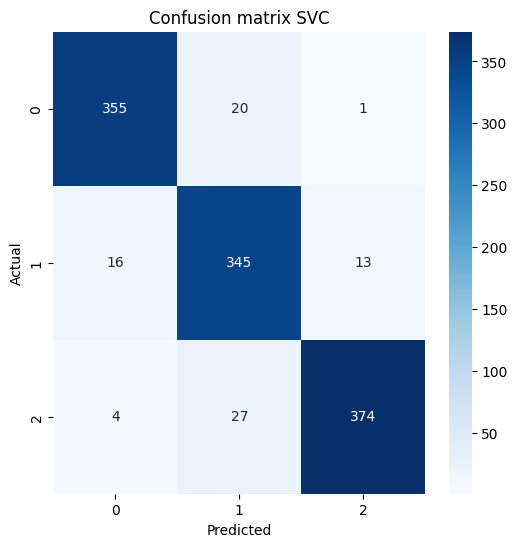

In [24]:
#Pengujian Menggunakan Confusion Matrix
print_conf(y_test, y_pred_svc, [0, 1, 2], title="Confusion matrix SVC")

In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

<function matplotlib.pyplot.show(close=None, block=None)>

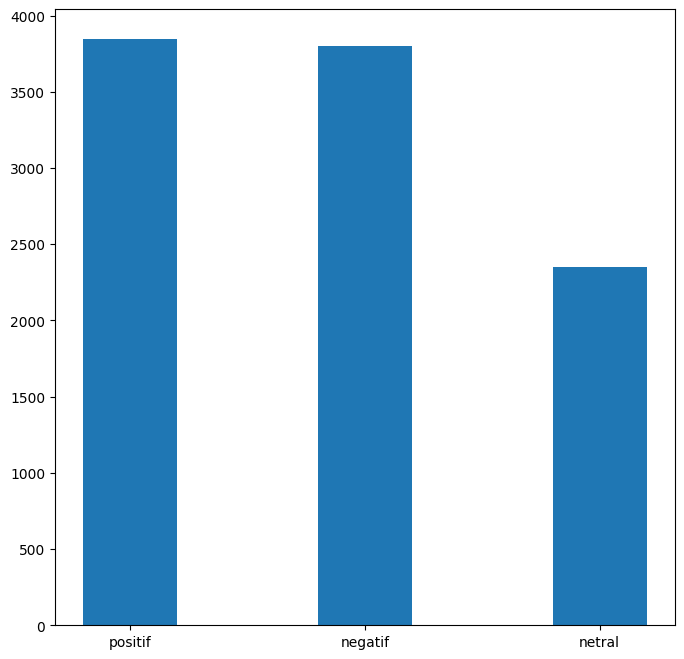

In [26]:
fig, ax = plt.subplots(figsize=(8,8))
x = data["sentimen"].value_counts()
labels = labels=["positif","negatif","netral"]
plt.bar(labels, x, width=0.4)
plt.show